# Example usage

In this notebook, I will demonstrate how to use `msions` to create MS TIC and ion plots.

## Imports

In [5]:
import msions.mzml as mzml
import msions.hardklor as hk
import msions.percolator as perc
import msions.kronik as kro
import msions.msplot as msplot
import msions.encyclopedia as encyclo
import msions.utils as msutils
import matplotlib.pyplot as plt

In [ ]:
# extra cell used to timeout build
ms1_df = mzml.tic_df("example_files/DIA_file.mzML")

## Create DataFrame from mzML file
`tic_df` creates a pandas DataFrame of MS1 scan information from an mzML file.

In [2]:
ms1_df = mzml.tic_df("example_files/DIA_file.mzML")

It can also be used to make a DataFrame of MS2 scan information

In [3]:
ms2_df = mzml.tic_df("example_files/DDA_file.mzML", level="2")

or a DataFrame with both sets of information.

In [4]:
ms_df = mzml.tic_df("example_files/short_DDA_file.mzML", level="all", include_ms1_info=True)

`peak_df` creates a pandas DataFrame containing the m/z, ion current, and retention time for all MS1 peaks.

In [5]:
ms1_peaks = mzml.peak_df("example_files/short_DDA_file.mzML")

## Read Hardklor file
`hk2df` will read a Hardklor tab-delimited file into a pandas DataFrame. After import, all columns that can be converted to a numeric data type will be.

In [6]:
hk_df = hk.hk2df("example_files/DIA_hk.hk")

`summarize_df` will summarize the TIC in each scan from a Hardklor pandas DataFrame or Hardklor tab-delimited file. 

In [7]:
hk.summarize_df(hk_df)

,rt,scan_num,TIC
0,0.0051,1,14409796
1,0.0574,152,15346213
2,0.1091,303,16216937
3,0.1607,454,16422145
4,0.2124,605,15524068
...,...,...,...
2493,99.9866,291311,108058
2494,99.9897,291312,24495
2495,99.9927,291313,51831
2496,99.9958,291314,424145


If an additional pandas DataFrame is provided with the MS1 scan information, the ion injection time will be mapped to each scan.

In [8]:
hk.summarize_df(hk_df, ms1_df)

,scan_num,rt,TIC,IT,ions
0,1,0.0051,14409796.0,50.000000,720489.800000
1,152,0.0574,15346213.0,40.343060,619113.184769
2,303,0.1091,16216937.0,40.586967,658196.294454
3,454,0.1607,16422145.0,43.578297,715649.106626
4,605,0.2124,15524068.0,40.905605,635021.398509
...,...,...,...,...,...
2560,291311,99.9866,108058.0,50.000000,5402.900000
2561,291312,99.9897,24495.0,50.000000,1224.750000
2562,291313,99.9927,51831.0,50.000000,2591.550000
2563,291314,99.9958,424145.0,50.000000,21207.250000


## Create a simplified DataFrame from a Kronik file
`simple_df` can be used to filter a Kronik DataFrame's rows and columns.

In [9]:
kro_df = kro.simple_df("example_files/DDA_match.kro")

`filter_df` can be used to filter a Kronik DataFrame within a retention time range.

In [10]:
kro.filter_df(kro_df, start=20, stop=80)

,first_scan,last_scan,num_scans,mass,charge,best_int,sum_int,best_rt,mz,best_rt_s
0,38596,44919,225,841.5023,2,1.483303e+10,5.915766e+11,24.8667,421.758430,1492.002
1,43401,45665,76,1313.6580,2,5.567430e+09,5.477088e+10,27.4002,657.836280,1644.012
2,61414,62885,53,1823.9778,2,5.446934e+09,4.207272e+10,37.4799,912.996180,2248.794
3,57080,59175,72,1953.0566,3,4.605176e+09,5.238194e+10,35.0052,652.026147,2100.312
4,56254,59449,110,1459.7095,3,4.408563e+09,5.981484e+10,34.9384,487.577113,2096.304
...,...,...,...,...,...,...,...,...,...,...
97079,98272,98352,5,892.2217,2,3.718200e+04,1.589230e+05,64.5663,447.118130,3873.978
97087,98041,98098,4,876.3758,2,3.487900e+04,1.013320e+05,64.4020,439.195180,3864.120
97100,97404,97463,4,848.5609,2,3.099600e+04,8.306610e+04,63.8228,425.287730,3829.368
97103,98727,98766,3,892.2208,2,3.035100e+04,6.099000e+04,64.9506,447.117680,3897.036


`match_rt_mass` can compare a Kronik DataFrame to itself to find redundancies.

In [11]:
redund_df = kro_df.copy()
redund_df["redund"] = redund_df.apply(kro.match_rt_mass, axis=1, other_df=kro_df, rt_diff=0.5) 

In [12]:
# view DataFrame
redund_df

,first_scan,last_scan,num_scans,mass,charge,best_int,sum_int,best_rt,mz,best_rt_s,redund
0,38596,44919,225,841.5023,2,1.483303e+10,5.915766e+11,24.8667,421.758430,1492.002,0
1,43401,45665,76,1313.6580,2,5.567430e+09,5.477088e+10,27.4002,657.836280,1644.012,0
2,61414,62885,53,1823.9778,2,5.446934e+09,4.207272e+10,37.4799,912.996180,2248.794,0
3,57080,59175,72,1953.0566,3,4.605176e+09,5.238194e+10,35.0052,652.026147,2100.312,0
4,56254,59449,110,1459.7095,3,4.408563e+09,5.981484e+10,34.9384,487.577113,2096.304,0
...,...,...,...,...,...,...,...,...,...,...,...
97120,5904,5946,3,653.6884,1,1.817700e+04,4.936000e+04,4.8106,654.695680,288.636,1
97121,8262,8324,4,614.6566,1,1.761600e+04,6.674839e+04,6.6897,615.663880,401.382,1
97122,1516,1557,3,669.3017,1,1.643800e+04,4.555800e+04,1.2335,670.308980,74.010,3
97123,4463,4547,5,614.3503,1,1.592000e+04,7.553350e+04,3.6536,615.357580,219.216,7


## Parse XML files from percolator output
`psms2df` will create a pandas DataFrame from a percolator XML output file.

In [13]:
psm_xml_df = perc.psms2df("example_files/short_DDA_xml.xml")

`id_scans` creates a column saying whether an MS2 was identified.

In [14]:
perc.id_scans("example_files/DDA_percolator.target.peptides.txt", ms2_df)

`match_kro` determines if Kronik features were identified in a percolator XML output file.

In [15]:
perc.match_kro(kro_df, psm_xml_df, ms_df)

## Analyze EncyclopeDIA output

`dia_df` creates a pandas DataFrame from an EncyclopeDIA elib output.

In [18]:
encyclo_df = encyclo.dia_df("example_files/DIA_elib.elib")

`match_hk` matches EncyclopeDIA elib output to Hardklor output.


In [19]:
hk_df["in_encyclo"] = hk_df.apply(encyclo.match_hk, axis=1, other_df=encyclo_df)

## Plot TIC and ions
`plot_data` can be used to plot the TIC and ions per MS1 scan in a pandas DataFrame.

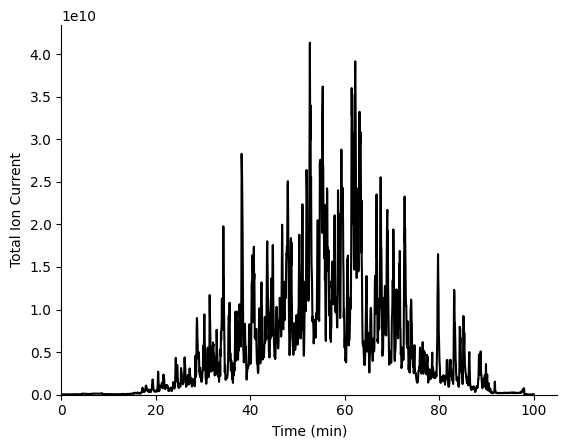

In [16]:
msplot.plot_data(ms1_df)

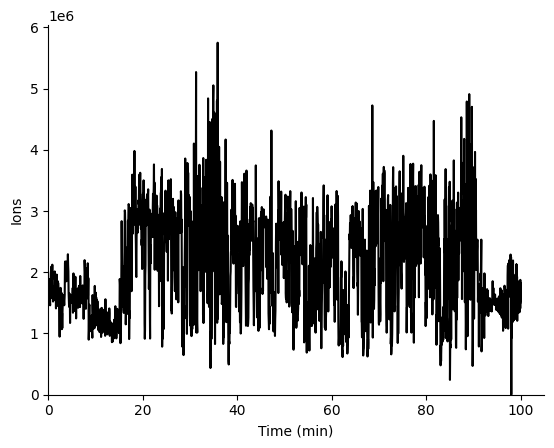

In [17]:
msplot.plot_data(ms1_df, data_type="ions")

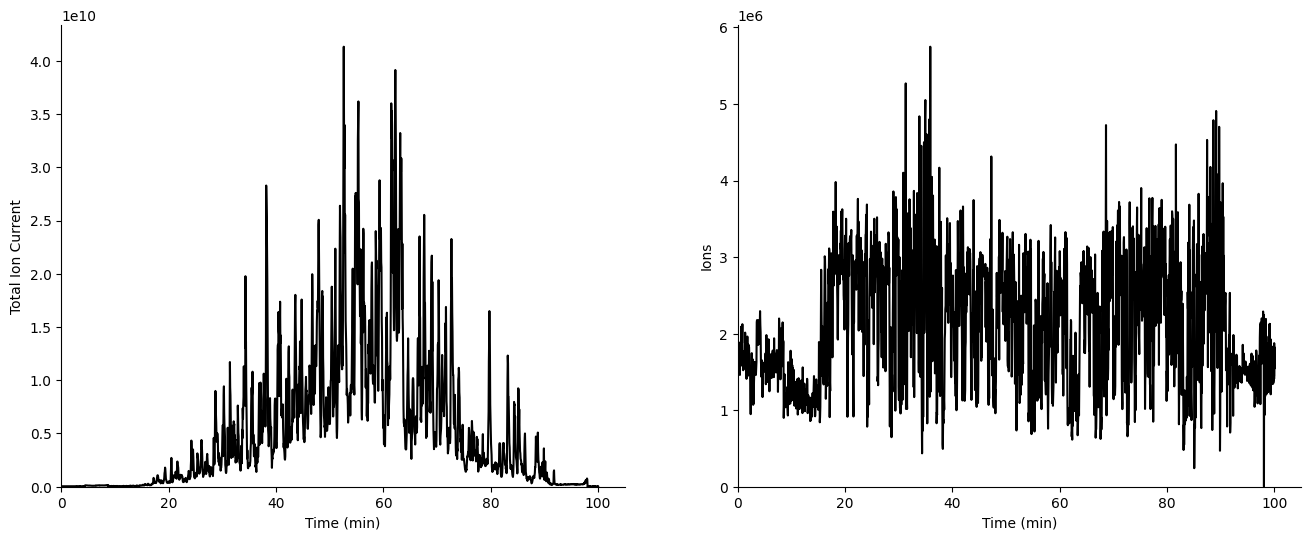

In [18]:
msplot.plot_data(ms1_df, data_type="both")

`plot_data` can also take mzML files as input.
plot the amount of identified signal if you provide a feature file/DataFrame and the identifications file/DataFrame.

## Miscellaneous utility functions

`bin_list` creates a list of bin edges for a histogram.

In [20]:
# define arguments
mz_bin_size = 4
mz_bin_mult = 1.0005
mz_start = 399
mz_end = 1005

bin_mz_list = msutils.bin_list(mz_start, mz_end, mz_bin_size, mz_bin_mult)

`bin_data` bins a pandas DataFrame using list(s) of bin edges.

In [21]:
msutils.bin_data(ms1_peaks, type="mz", bin_mz_list=bin_mz_list)

,rt,bin_mz,ips
0,32.542579,"[399.0, 403.002)",1.048150e+08
1,32.542579,"[403.002, 407.004)",4.862561e+06
2,32.542579,"[407.004, 411.006)",5.346059e+06
3,32.542579,"[411.006, 415.008)",5.346583e+06
4,32.542579,"[415.008, 419.01)",7.255431e+06
...,...,...,...
5129,33.093167,"[983.292, 987.294)",2.364387e+06
5130,33.093167,"[987.294, 991.296)",2.474095e+06
5131,33.093167,"[991.296, 995.298)",3.682017e+06
5132,33.093167,"[995.298, 999.3)",3.545738e+06


## Technical Note Use Cases

In [2]:
# initiate dictionary to store data
note_dict = {}

In [3]:
# define directory
human_dir = "D:/msions/chris/QuantFiles/"

#### EV

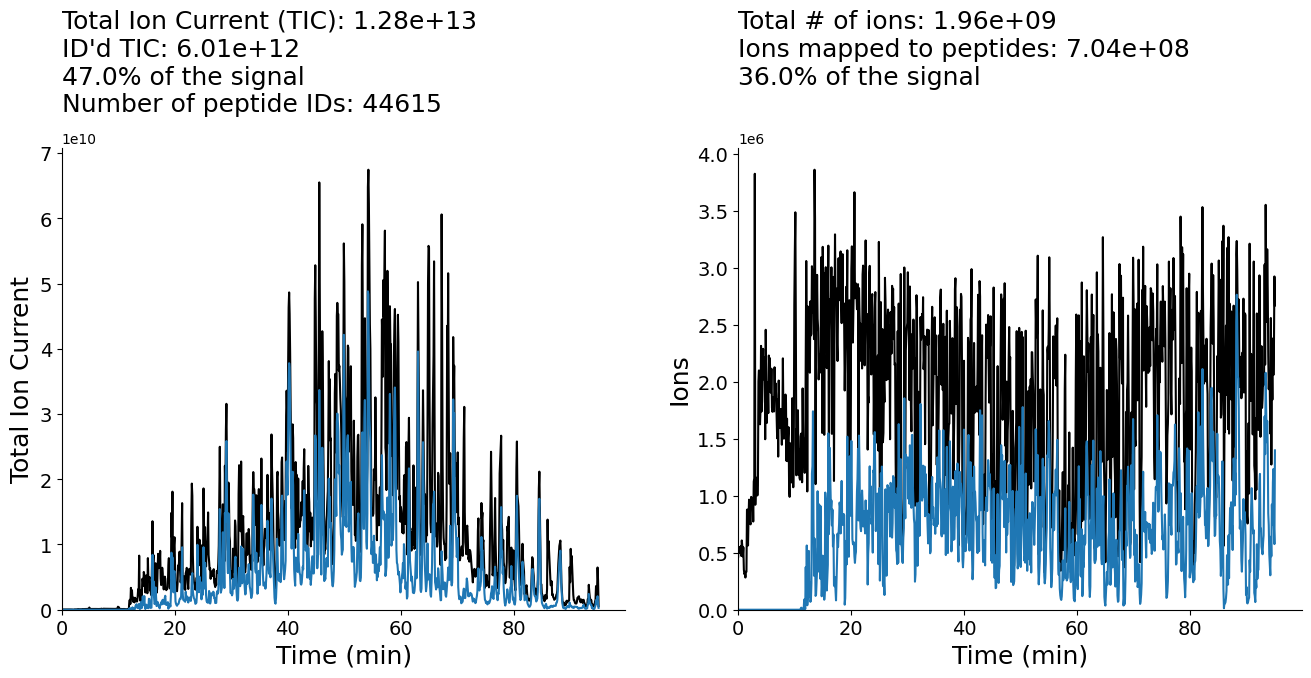

In [6]:
file_name = "Ecl_2022_0718_FreezeThaw_Q1_EV10_12mz_26"
suf = ""

note_dict[file_name+"_ms1"+suf], note_dict[file_name+"_sumid"+suf], note_dict[file_name+"_id"+suf], note_dict[file_name+"_hk"+suf] = msplot.plot_data(human_dir+"mzMLs/SixQuantitativeIons/"+file_name+".mzML", 
                 human_dir+"hk_files/"+file_name+"_MS1_3sn.hk", 
                 human_dir+"mzMLs/SixQuantitativeIons/"+file_name+".mzML.elib", 
                 method="DIA", data_type="both", stats="title", return_dfs=True)

#### Plasma

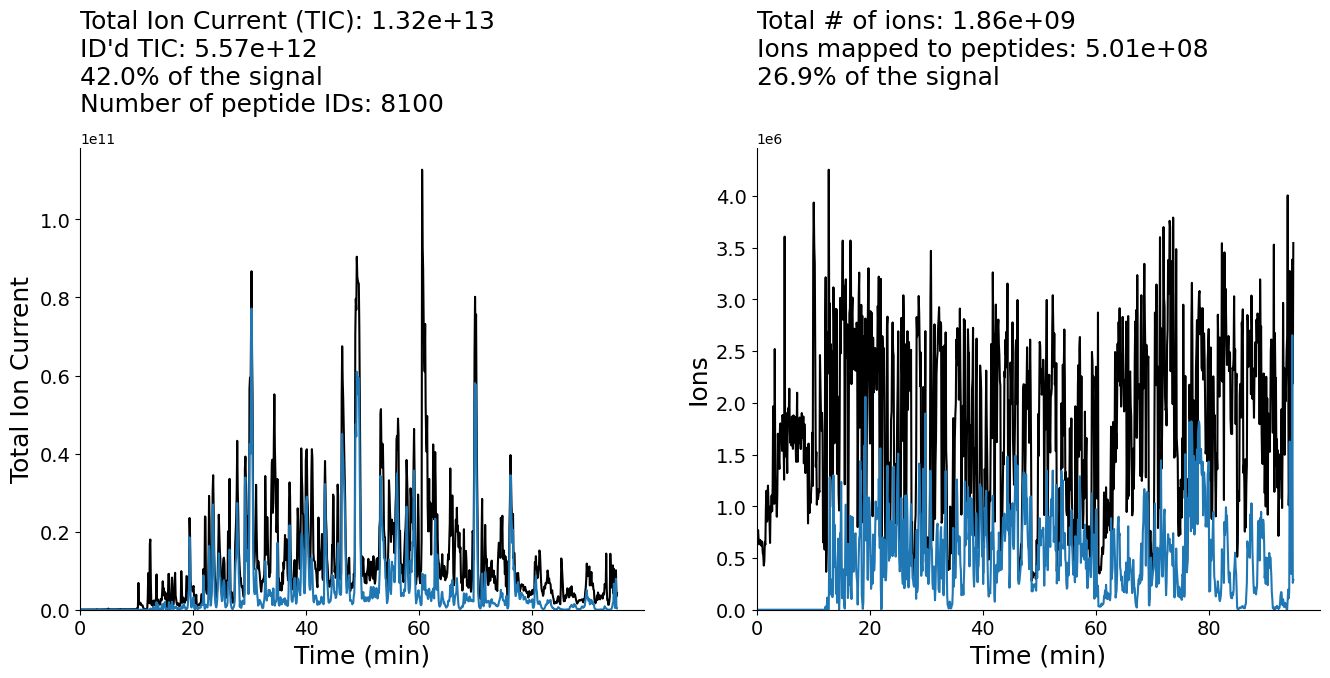

In [8]:
file_name = "Ecl_2022_0718_FreezeThaw_Total_01_12mz_28"
suf = ""

note_dict[file_name+"_ms1"+suf], note_dict[file_name+"_sumid"+suf], note_dict[file_name+"_id"+suf], note_dict[file_name+"_hk"+suf] = msplot.plot_data(human_dir+"mzMLs/SixQuantitativeIons/"+file_name+".mzML", 
                 human_dir+"hk_files/"+file_name+"_MS1_3sn.hk", 
                 human_dir+"mzMLs/SixQuantitativeIons/"+file_name+".mzML.elib", 
                 method="DIA", data_type="both", stats="title", return_dfs=True)

### Mouse DB

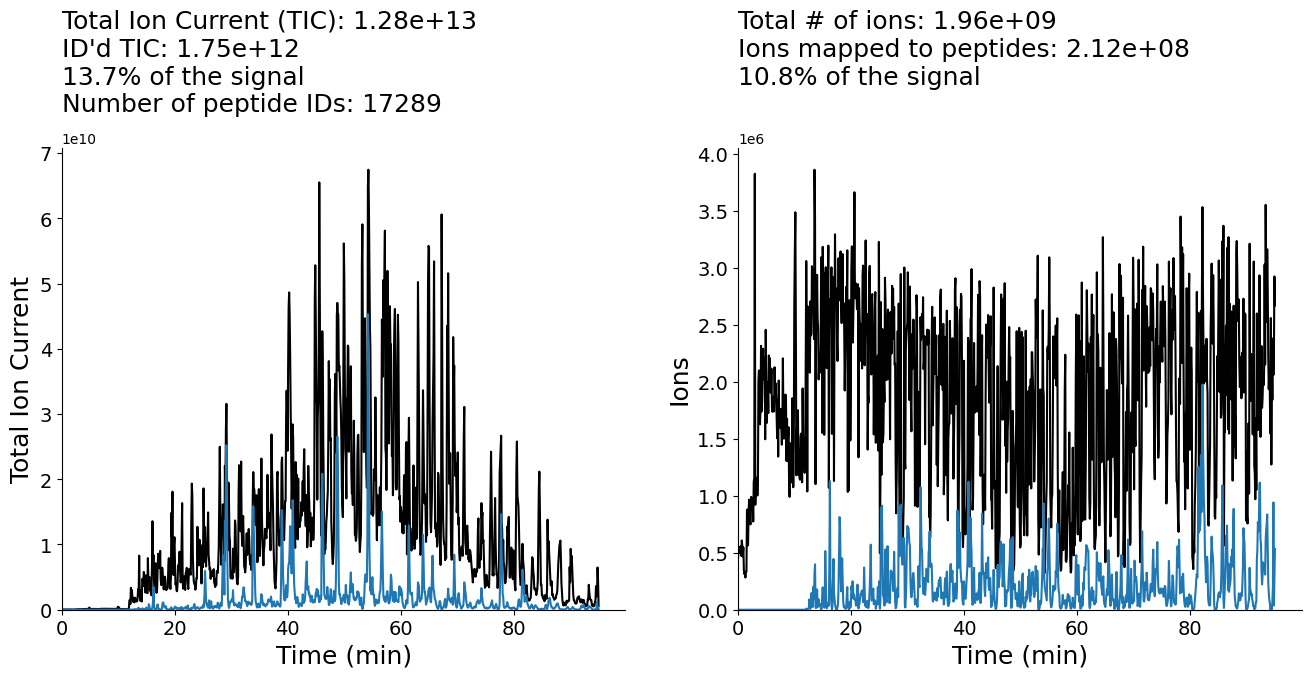

In [22]:
file_name = "Ecl_2022_0718_FreezeThaw_Q1_EV10_12mz_26"
suf = "_mus"
mzml_dir = "mzMLs/mouse_fasta/"

note_dict[file_name+"_ms1"+suf], note_dict[file_name+"_sumid"+suf], note_dict[file_name+"_id"+suf], note_dict[file_name+"_hk"+suf] = msplot.plot_data(human_dir+mzml_dir+file_name+".mzML", 
                 human_dir+"hk_files/"+file_name+"_MS1_3sn.hk", 
                 human_dir+mzml_dir+file_name+".mzML.elib", 
                 method="DIA", data_type="both", stats="title", return_dfs=True)

### Missing Albumin

In [17]:
import sqlite3
# delete Albumin protein peptides from elib for plasma
file_name = "Ecl_2022_0718_FreezeThaw_Total_01_12mz_28"
suf = "_noalbu"
mzml_dir = "mzMLs/SixQuantitativeIons/"

# create connection
elib_connection = sqlite3.connect(human_dir+mzml_dir+file_name+".mzML_noALBU.elib", 
                                  timeout=10)

# create sql query
sql = """DELETE FROM entries
		 WHERE PeptideSeq IN (
            SELECT PeptideSeq
            FROM peptidetoprotein
            WHERE ((isDecoy = 0) AND (ProteinAccession LIKE '%ALBU%'))
         );"""

cur = elib_connection.cursor()

cur.execute(sql)

elib_connection.commit()

# close the database connection
elib_connection.close()

In [15]:
import sqlite3
# delete Albumin protein peptides from elib for EV
file_name = "Ecl_2022_0718_FreezeThaw_Q1_EV10_12mz_26"
suf = "_noalbu"
mzml_dir = "mzMLs/SixQuantitativeIons/"

# create connection
elib_connection = sqlite3.connect(human_dir+mzml_dir+file_name+".mzML_noALBU.elib", 
                                  timeout=10)

# create sql query
sql = """DELETE FROM entries
		 WHERE PeptideSeq IN (
            SELECT PeptideSeq
            FROM peptidetoprotein
            WHERE ((isDecoy = 0) AND (ProteinAccession LIKE '%ALBU%'))
         );"""

cur = elib_connection.cursor()

cur.execute(sql)

elib_connection.commit()

# close the database connection
elib_connection.close()

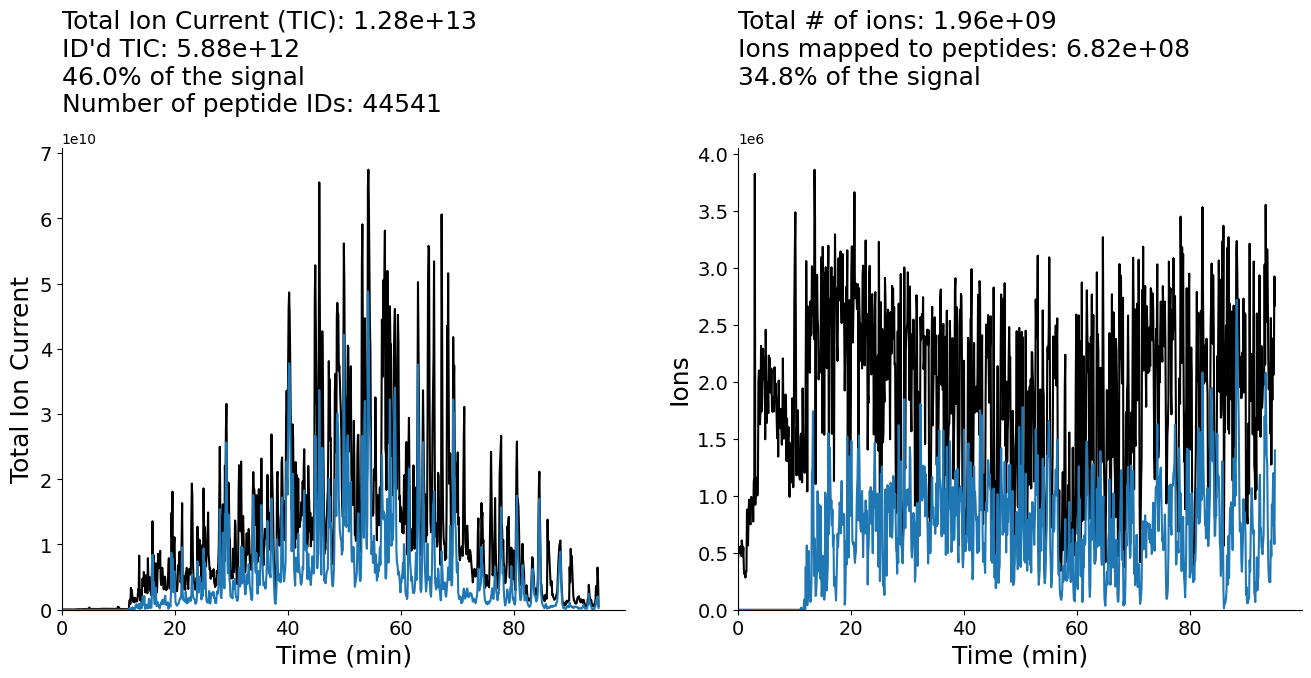

In [18]:
file_name = "Ecl_2022_0718_FreezeThaw_Q1_EV10_12mz_26"
suf = "_noalbu"
mzml_dir = "mzMLs/SixQuantitativeIons/"

note_dict[file_name+"_ms1"+suf], note_dict[file_name+"_sumid"+suf], note_dict[file_name+"_id"+suf], note_dict[file_name+"_hk"+suf] = msplot.plot_data(human_dir+mzml_dir+file_name+".mzML", 
                 human_dir+"hk_files/"+file_name+"_MS1_3sn.hk", 
                 human_dir+mzml_dir+file_name+".mzML_noALBU.elib", 
                 method="DIA", data_type="both", stats="title", return_dfs=True)

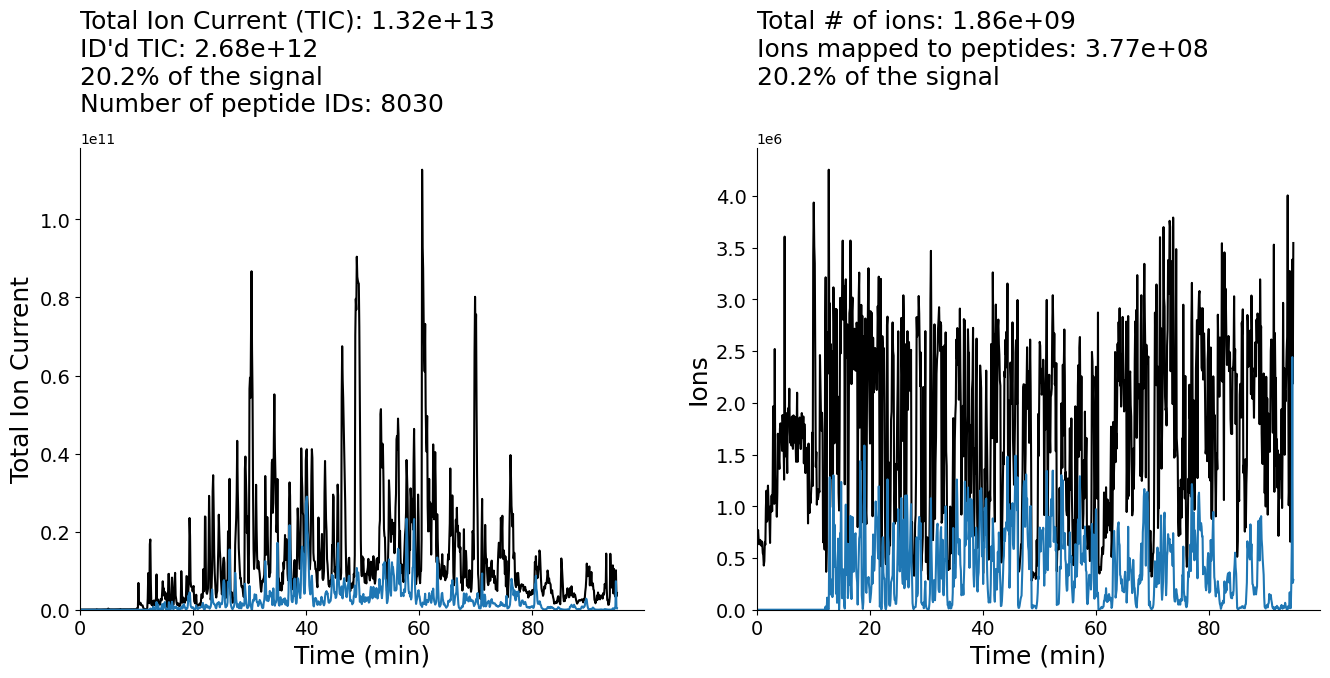

In [19]:
file_name = "Ecl_2022_0718_FreezeThaw_Total_01_12mz_28"
suf = "_noalbu"
mzml_dir = "mzMLs/SixQuantitativeIons/"

note_dict[file_name+"_ms1"+suf], note_dict[file_name+"_sumid"+suf], note_dict[file_name+"_id"+suf], note_dict[file_name+"_hk"+suf] = msplot.plot_data(human_dir+mzml_dir+file_name+".mzML", 
                 human_dir+"hk_files/"+file_name+"_MS1_3sn.hk", 
                 human_dir+mzml_dir+file_name+".mzML_noALB.elib", 
                 method="DIA", data_type="both", stats="title", return_dfs=True)